# Heart Failure Prediction Data Analysis
---
The aim of this project is to analyze the different factors that contribute to heart disease

The dataset for this project is from Kaggle
> [Kaggle dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

## Notebook Content

- **Step 1**: Install and import necessary libraries
- **Step 2**: Reading and exploring data
- **Step 3**: Data cleaning and preprocessing
- **Step 4**: Descriptive Statistics
- **Step 5**: Data Analysis and visualization
- **Step 6**: Predictive models

### Step 1: Install and  import libraries and dataset
---

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install seaborn
# !pip install sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Step 2: Reading and exploring data
---

In [3]:
df=pd.read_csv("heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

### **Data Attributes**

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.shape

(918, 12)

### Step 3:  Data Cleaning and Preprocessing 
---


In [6]:
# Check for null values

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
# Check for dupliacte values

df.duplicated().any()

False

In [8]:
# checking for 0 values in numerical variables

df[["Cholesterol"]].value_counts()
df[["Age"]].value_counts()
df[["RestingBP"]].value_counts()
df[["MaxHR"]].value_counts()

MaxHR
150      43
140      41
120      36
130      33
160      25
         ..
71        1
70        1
69        1
67        1
202       1
Length: 119, dtype: int64

In [9]:
# Serum cholesterol can't be 0

df[["Cholesterol"]].value_counts()

Cholesterol
0              172
254             11
223             10
220             10
211              9
              ... 
117              1
123              1
131              1
293              1
603              1
Length: 222, dtype: int64

In [10]:
# replaced 0 to np.nan then dropped nan.

df["Cholesterol"].replace(0,np.nan,inplace=True)
df.dropna(inplace=True)

### Step 4: Descriptive Statistics
---

In [11]:
df.describe().T

count        mean        std   min     25%    50%    75%    max
Age           746.0   52.882038   9.505888  28.0   46.00   54.0   59.0   77.0
RestingBP     746.0  133.022788  17.282750  92.0  120.00  130.0  140.0  200.0
Cholesterol   746.0  244.635389  59.153524  85.0  207.25  237.0  275.0  603.0
FastingBS     746.0    0.167560   0.373726   0.0    0.00    0.0    0.0    1.0
MaxHR         746.0  140.226542  24.524107  69.0  122.00  140.0  160.0  202.0
Oldpeak       746.0    0.901609   1.072861  -0.1    0.00    0.5    1.5    6.2
HeartDisease  746.0    0.477212   0.499816   0.0    0.00    0.0    1.0    1.0

#### Correlation Matrix

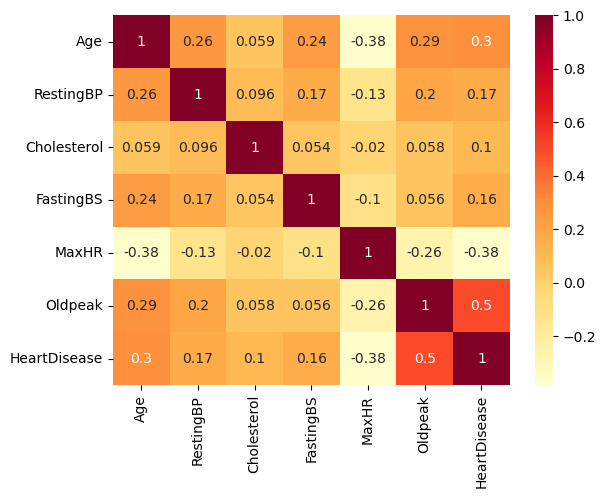

In [12]:
sns.heatmap(df.corr(),annot=True,cmap="YlOrRd")
plt.show()

### Analysis : 
    
    From the above correlation matrix we can clearly see that oldpeak and Heart Disease have the higest correlation,
    while `MaxHR` and Age have the lowest along with MaxHR and Heart Disease
    
---



#### Plotting pairplot

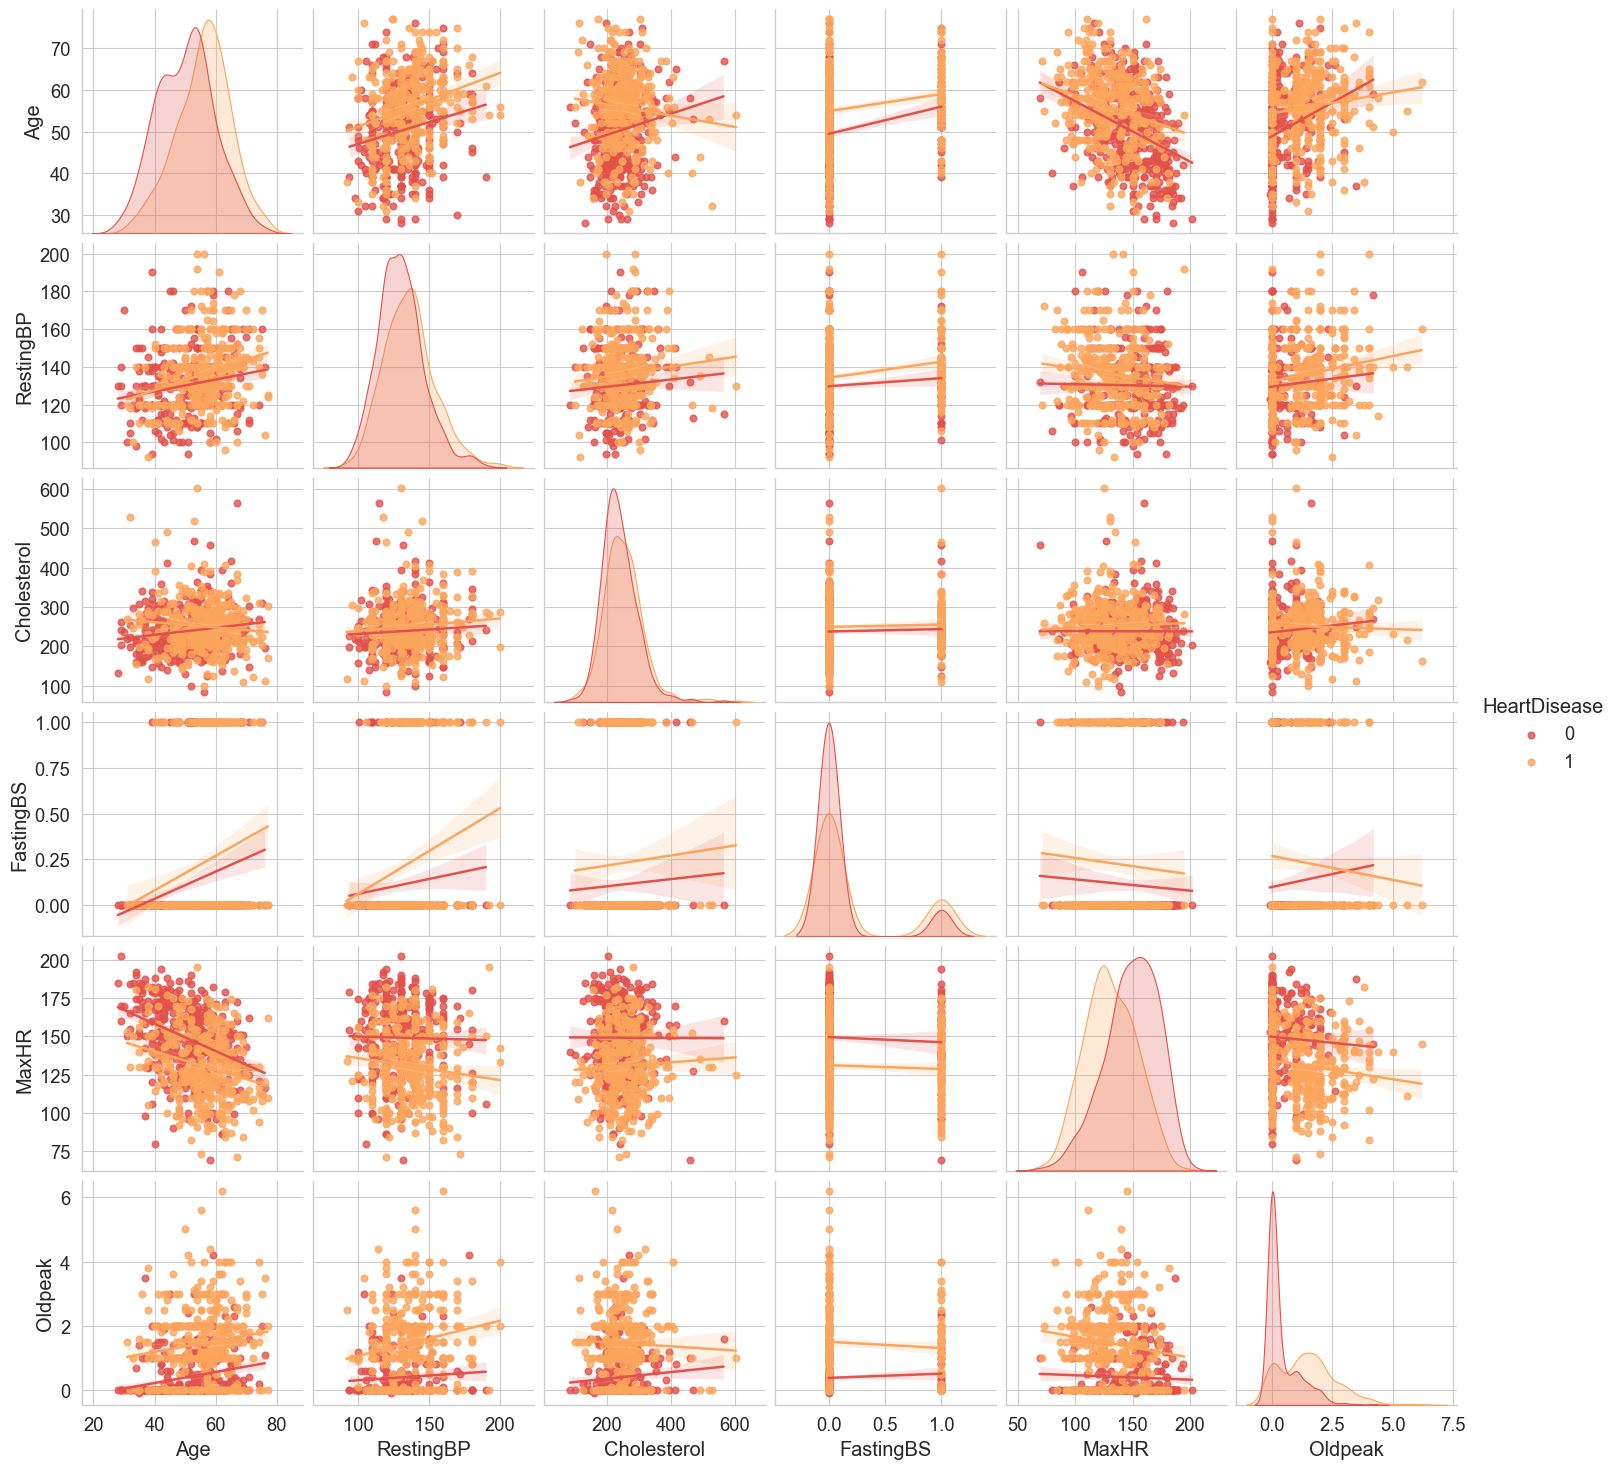

In [56]:
sns.set_theme(context="paper",
              font_scale=1.5,
              palette="Spectral",
              style="whitegrid")
sns.pairplot(df, hue="HeartDisease",
             kind="reg")
plt.show()

### Analysis:
    
    From the above pairplot we can see that MaxHr has a negative correlation or a very weak correlation with other features.
    RestingBP has a positive or weak correlation with other features
---


### Step 5: Data Analysis and Visualization

#### Sorting data into continuous and categorical

In [14]:
cat_value = []
cont_value = []

for column in df.columns:
    if len(df[column].unique())<=5:
        cat_value.append(column)
    else:
        cont_value.append(column)

#### Plotting Continous Data

In [15]:
cont_value

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [16]:
# function to plot distribution plot

def dist_plot(data,title):
    sns.set_theme(context="notebook",palette="OrRd_r",style="whitegrid")
    sns.histplot(data,kde=True,stat="count")
    plt.title(title)
    plt.show()

### plot distribution plots

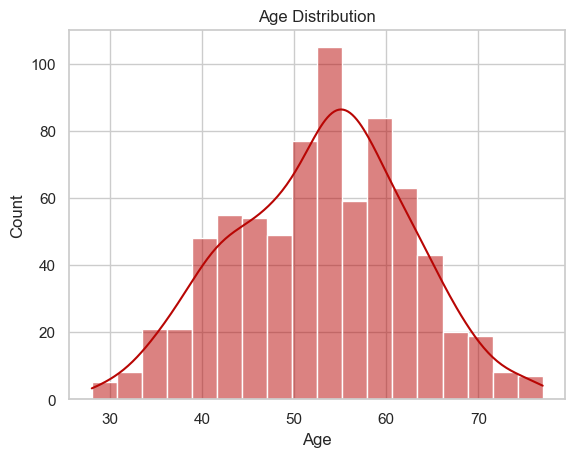

In [58]:
# Age Distribution
dist_plot(df["Age"],"Age Distribution")

The plot distribution for Age is right skewed. Majority of the data is between  50 - 65. Avergae age being 53 and median age 54.

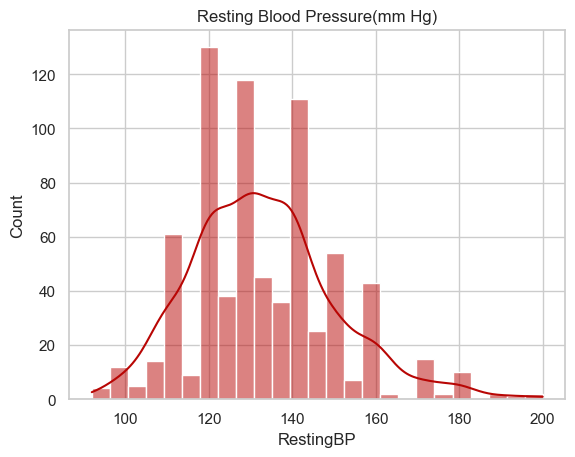

In [59]:
dist_plot(df["RestingBP"], "Resting Blood Pressure(mm Hg)")

When we look at the RestingBP within our dataset, the majority lies 120 mmHg and 140 mmHg.
The average RestingBP is 133 mmHg and median is 130 mmHg.

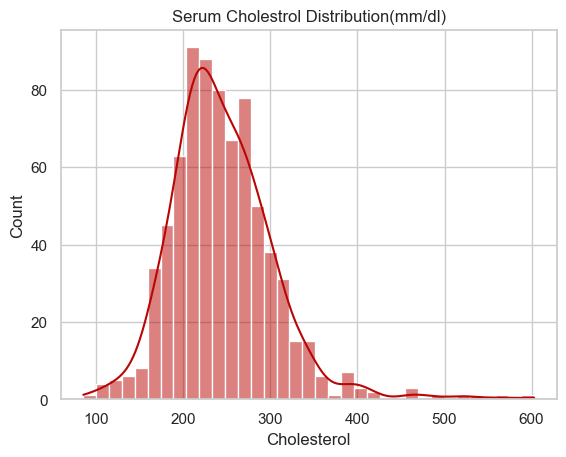

In [60]:
dist_plot(df["Cholesterol"], "Serum Cholestrol Distribution(mm/dl)")

The serum cholesterol is concentrated between 200 - 300 mm/dl.
The average being 244 mm/dl and median 237 mm/dl

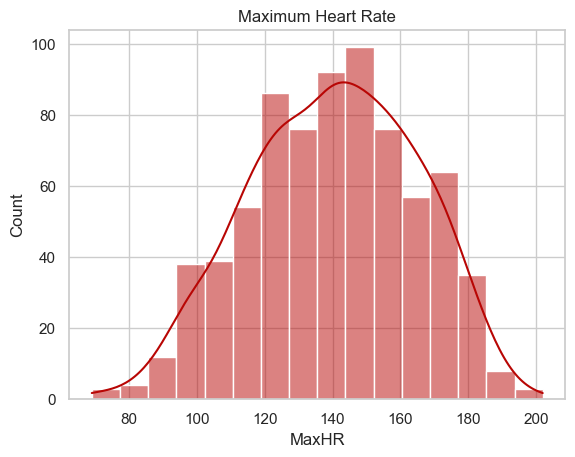

In [61]:
dist_plot(df["MaxHR"],"Maximum Heart Rate")

The Maximum Heart Rate in our dataset lies between 120 to 160 bpm (beats per minute).
The average value for MaxHR is 140 and the median is 140 as well.

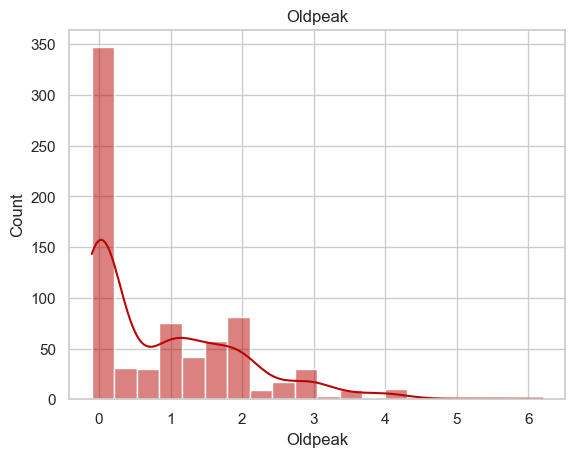

In [62]:
dist_plot(df["Oldpeak"],"Oldpeak")

Oldpeak measures the amount of ST segment depression on ECG. The values are between 0 and 6.
An Oldpeak value of 0 being no ST depression and anything over 1 being severe ST depression.
From our distribution plot we can see that most of our data is without ST depression.

#### How many people have heart disease and how many don't?

In [44]:
# total number of people with and without heart disease

pie_plot=df["HeartDisease"].value_counts()
pie_plot

0    390
1    356
Name: HeartDisease, dtype: int64

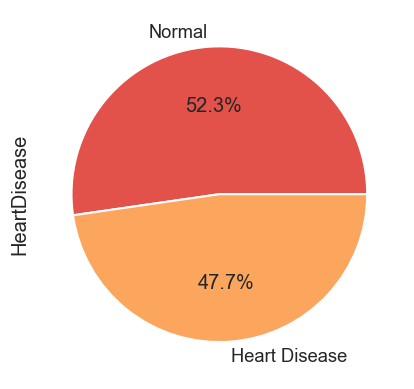

In [54]:
# Plot a pie plot for Heart Disease

sns.set_theme(context="talk",
              font_scale=0.8,
              palette="Spectral")

pie_plot.plot.pie(autopct="%1.1f%%", 
                  labels = ["Normal", "Heart Disease"])

plt.show()

From the pie plot we can clearly see that 52.3% of our dataset population is without heart disease
and 47.7% has heart disease

#### Plotting Catergorical Data

In [20]:
# Categorical values

cat_value

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [21]:
# Function for plotting count plots of categorical data

def count_plot(xvalue,title):
    sns.set_theme(context="talk",font_scale=0.8,palette="Spectral",style="whitegrid")
    sns.countplot(data=df,x=xvalue,hue="HeartDisease")
    plt.legend(labels=["Normal","Heart Disease"])
    plt.title(f"{title} Distribution According to Heart Disease")
    plt.tight_layout()
    plt.show()

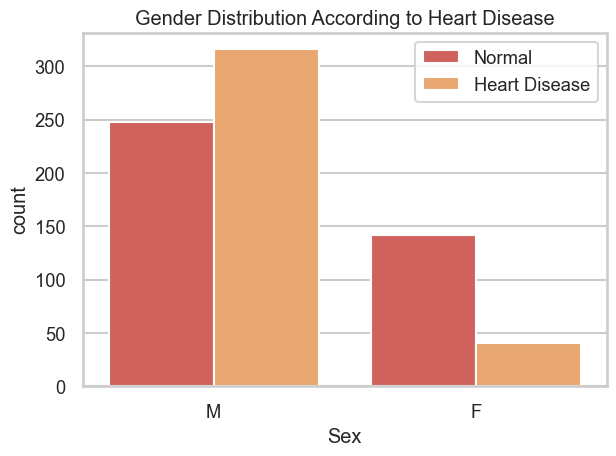

In [64]:
# Display the count plots

count_plot(df["Sex"],"Gender")

The bar plot is a count of people with and without heart disease by gender.
Males have a higher probablity of having heart disease than females within our dataset.

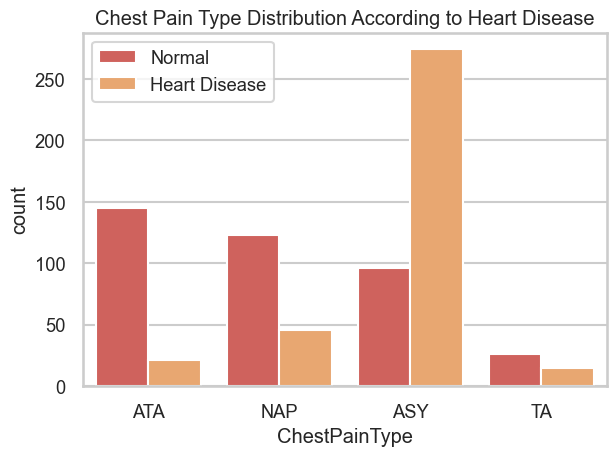

In [65]:
count_plot(df["ChestPainType"],"Chest Pain Type")

A large number of people with heart disease have asymtomatic chest pain type.

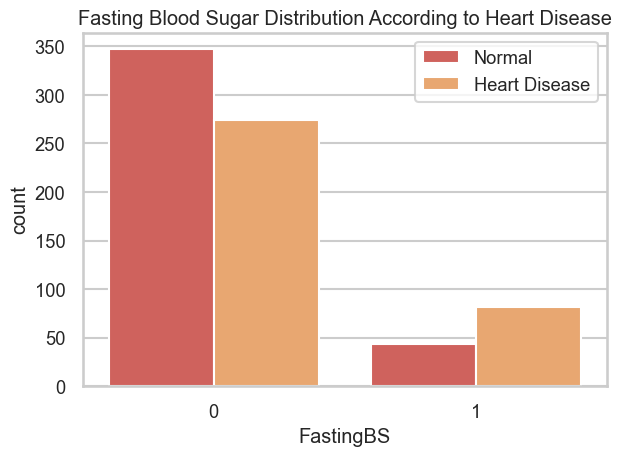

In [66]:
count_plot(df["FastingBS"],"Fasting Blood Sugar")

The value for 1 is interpreted as having a FastingBS > 120 mg/dl.
From the bar plot we can see that people with heart disease have a Fasting Blood Sugar greater than 120 mg/dl,

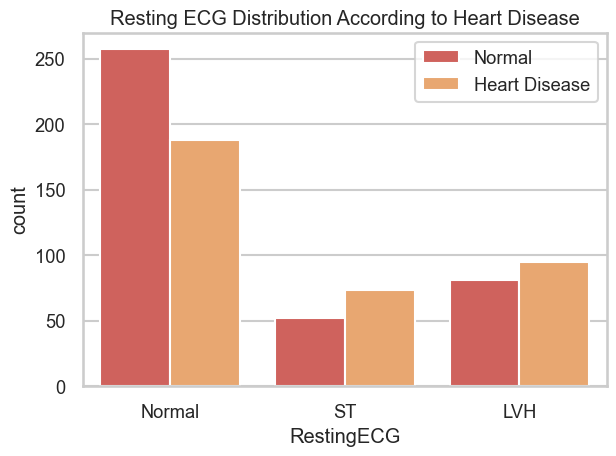

In [67]:
count_plot(df["RestingECG"],"Resting ECG")

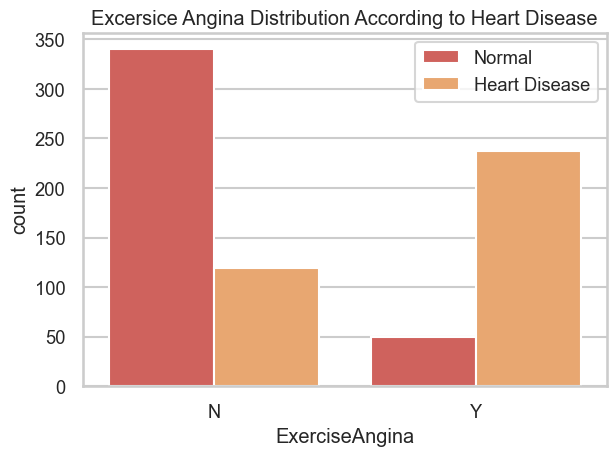

In [68]:
count_plot(df['ExerciseAngina'],"Excersice Angina")

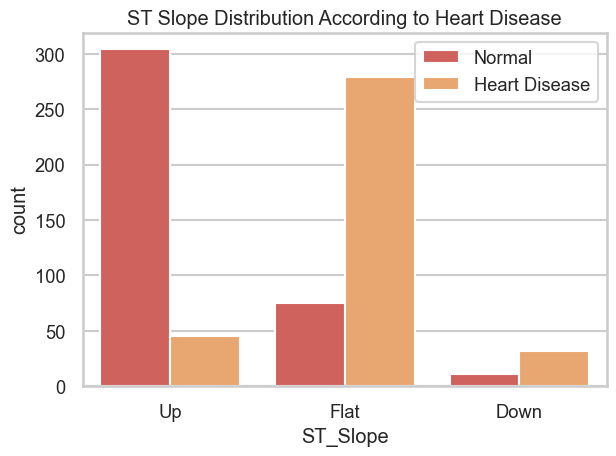

In [69]:
count_plot(df['ST_Slope'],"ST Slope")

### Boxplots for distribution of numerical data with reference to gender and heart disease 

In [23]:
# function for plotting box plots

def box(df,y):
    fig=px.box(data_frame=df,x="HeartDisease",y=y, color = "Sex", 
            color_discrete_sequence=px.colors.diverging.RdYlGn,
              template="ggplot2")
    fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1],
        ticktext = ['Normal', 'Heart Disease']))
        
        
    fig.show()

In [24]:
cont_value

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [25]:
# Display the boxplots

box(df,"Age")
box(df,"RestingBP")
box(df,"Cholesterol")
box(df,"MaxHR")
box(df,"Oldpeak")

### Logistic Regression

In [26]:
# dummify categorical values

df2=pd.get_dummies(df)

In [27]:
# Separate arguements in data as 
# X - independent variables and y as dependent variables

X = df2.drop("HeartDisease", axis = 1)
y = df2["HeartDisease"]

In [28]:
# divide the dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state = 50)

In [29]:
# Establish the model and fit 

dum_reg = LogisticRegression()
dum_reg.fit(X_train,y_train)

C:\Users\uzmaf\anaconda3\envs\pyviz\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [30]:
print(dum_reg.intercept_)
print(dum_reg.coef_)

[-0.73680047]
[[ 0.01740963  0.00152731  0.00177104  0.22212807 -0.0049341   0.35362815
  -1.3023645   0.62411927  0.77208562 -0.70983569 -0.8278986   0.08740344
   0.04838886 -0.38011759 -0.3465165  -0.66616052 -0.01208471 -0.38013361
   1.08549214 -1.38360376]]


**Find the accuracy of our model**
[reference](https://blog.learnbay.co/top-data-science-projects-in-healthcare#4-heart-attack-prediction)

In [31]:
y_pred=dum_reg.predict(X_test)

In [32]:
accuracy = sm.accuracy_score(y_test,y_pred)
print(f"Logistic testing accuracy is {accuracy*100:.0f}%")

Logistic testing accuracy is 87%


### Decision tree.

In [33]:
# Separate target variable

X = df2.drop("HeartDisease", axis = 1)
y = df2["HeartDisease"]

# Split data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state = 50)
# Function to perform training with Entropy

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred_dt=clf.predict(X_test)

**Accuray of decision tree**

In [35]:
accuracy_dt = sm.accuracy_score(y_test,y_pred_dt)
print(f"Decision Tree accuracy is {accuracy_dt*100:.0f}%")

Decision Tree accuracy is 84%


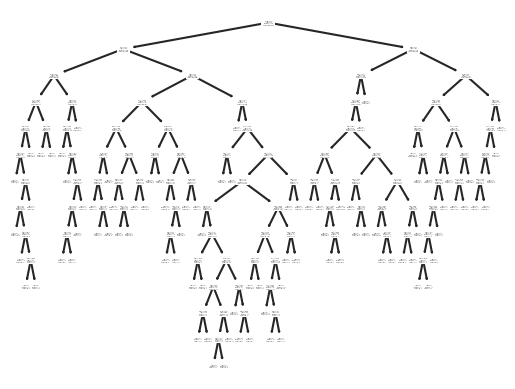

In [36]:
tree.plot_tree(clf)
plt.show()

In [37]:
## add analysis to this and readme.